# Imprting necessary **libraries**

In [46]:
import tensorflow as tf 
import cv2
import numpy as np

# Getting and preprocessing the dataset 

## Getting the dataset
- The dataset that I'm gonna work with is the fer2013 from kaggle
1. mounting google drive into my notebook
1. Showing the files that contains the dataset

In [47]:
# 1. First mounting google drive into /content/gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [48]:
# 2. This is our dataset
!ls /content/gdrive/MyDrive/Colab\ Notebooks/datasets/archive.zip

ls: cannot access '/content/gdrive/MyDrive/Colab Notebooks/datasets/archive.zip': No such file or directory


In [49]:
# 3. making a directory and moving the data on it to extract it
!mkdir /content/dataset
!mv /content/gdrive/MyDrive/Colab\ Notebooks/datasets/archive.zip /content/dataset/

mkdir: cannot create directory ‘/content/dataset’: File exists
mv: cannot stat '/content/gdrive/MyDrive/Colab Notebooks/datasets/archive.zip': No such file or directory


In [50]:
# 4. Unzipping the dataset
import zipfile
with zipfile.ZipFile('/content/dataset/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset/')

In [51]:
!ls /content/dataset/

archive.zip  test  train


**Now I've imported the data from drive and extracted it succesfully into /content/dataset**

## Preprocessing the dataset

In [52]:
import matplotlib.pyplot as plt

- Plotting a sample image 

The shape of the image is (48, 48, 3)


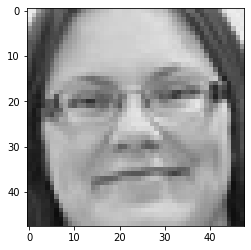

In [53]:
train_path = '/content/dataset/train'
sample_img = cv2.imread(train_ds_path + '/happy/Training_1206.jpg')
print(f"The shape of the image is {sample_img.shape}")
plt.imshow(sample_img)

### I'm gonna use Transefer learning here so I must preprocess the images to work with the resnet archticture.
1. Extract every image from its folder (happy, sad, etc) in the `train` folder
1. Label them as happy = 0, sad = 1 etc.
1. put those images into a numpy array assigned to every image its label 

In [64]:
sample_img_rsz = np.resize(sample_img, (224,224,3))

In [67]:
# adding a label for the above sample_img
# and resizing it to match the input shape of resnet (224, 224, 3)
sample_imgarr = np.array([np.resize(sample_img, (224,224,3)), 0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [71]:
print(sample_imgarr.shape)
print(sample_imgarr[0].shape)

(2,)
(224, 224, 3)


### Renaming folders 

In [73]:
# Those are the folders that the data divided into
!ls /content/dataset/train

angry  disgust	fear  happy  neutral  sad  surprise


In [78]:
# creating lablels and renaming the folders
labels = {"angry": 0, "disgust": 1, "fear": 2, "happy": 3, 
          "neutral": 4, "sad": 5, "surprise": 6}

# Renaming these local folders
for folder in os.listdir('/content/dataset/train/'):
  num = labels[folder]
  os.rename(f'/content/dataset/train/{folder}', f'/content/dataset/train/{num}')


In [79]:
# Succesfully renamed
!ls /content/dataset/train

0  1  2  3  4  5  6


### Extracting every image and put it in an array
1. Extract the image
1. resizing it
1. labeling that image
1. append it to an array

In [80]:
train_ds_path

'/content/dataset/train'

In [101]:
train_ds = []

def prepare_ds(ds_path):
  for folder in os.listdir(ds_path):
    for img_name in os.listdir(ds_path + f'/{folder}'):
      # print(ds_path + f'/{folder}/{img_name}')

      # reading the img
      img = cv2.imread(ds_path + f'/{folder}/{img_name}')

      #Resizing and adding the folder name as the label
      img_arr = np.array([np.resize(img, (224,224,3)), int(folder)])

      # append it to the big numpy list
      train_ds.append(img_arr)


In [102]:
prepare_ds(train_ds_path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [106]:
print(f'Number of images {len(train_ds)}')
print(f'shape of our images {train_ds[0][0].shape}')
print(f'The label of our first images {train_ds[0][1]}')

Number of images 28709
shape of our images (224, 224, 3)
The label of our first images 6
